# Jupter notebook demostration
    1. Using tab for searching (modules, attribues ...etc)
    2. Auotmatic print out the last line in each ecll

# Himwari pic

In [1]:
import cwbplot.IO_himawari_tools as tools
import  matplotlib.pyplot as plt

In [2]:
out=tools.HIMAWARI('202105250000')
print(type(out))
type(out)

<class 'cwbplot.IO_himawari_tools.HIMAWARI'>


cwbplot.IO_himawari_tools.HIMAWARI

In [3]:
# show object info
#

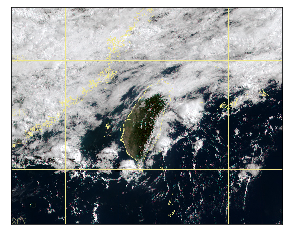

In [4]:
## get projection info of himawari
bm=out.get_basemap()
bm.imshow(out.data_rgb)

# XML file

In [6]:
import cwbplot.tools as tool

In [8]:
## how to use 
print(tool.read_xml_cwb.__doc__)

  read_xml_cwb(data_time_str,var_list,prefix='')
     data_time_str: string format(YYYYMMDDHHNN) in UTC
  


In [9]:
## Introduce pandas format
out=tool.read_xml_cwb('202105250000','ELEV WSPD WDIR HUMD')
out

,lat,lon,ELEV,WDIR,HUMD
466940,25.133314,121.740475,26.7,30.0,1.00
466900,25.164889,121.448906,19.0,300.0,0.82
466880,24.997647,121.442017,11.0,60.0,0.80
466930,25.162078,121.544547,607.1,200.0,0.98
466910,25.182586,121.529731,832.6,210.0,1.00
...,...,...,...,...,...
C0M800,23.299075,120.664767,440.0,0.0,0.67
C0K560,23.686450,120.603417,117.0,0.0,0.70
C0K550,23.514319,120.229736,15.0,42.0,0.73
C0X290,23.267772,120.125481,10.0,27.0,0.81


In [10]:
out.insert(0,'yyyymmddhhnn','202105250000')
out

,yyyymmddhhnn,lat,lon,ELEV,WDIR,HUMD
466940,202105250000,25.133314,121.740475,26.7,30.0,1.00
466900,202105250000,25.164889,121.448906,19.0,300.0,0.82
466880,202105250000,24.997647,121.442017,11.0,60.0,0.80
466930,202105250000,25.162078,121.544547,607.1,200.0,0.98
466910,202105250000,25.182586,121.529731,832.6,210.0,1.00
...,...,...,...,...,...,...
C0M800,202105250000,23.299075,120.664767,440.0,0.0,0.67
C0K560,202105250000,23.686450,120.603417,117.0,0.0,0.70
C0K550,202105250000,23.514319,120.229736,15.0,42.0,0.73
C0X290,202105250000,23.267772,120.125481,10.0,27.0,0.81


In [11]:
out[['lat','lon','ELEV']]

,lat,lon,ELEV
466940,25.133314,121.740475,26.7
466900,25.164889,121.448906,19.0
466880,24.997647,121.442017,11.0
466930,25.162078,121.544547,607.1
466910,25.182586,121.529731,832.6
...,...,...,...
C0M800,23.299075,120.664767,440.0
C0K560,23.686450,120.603417,117.0
C0K550,23.514319,120.229736,15.0
C0X290,23.267772,120.125481,10.0


# QPE file

In [5]:
import cwbplot.IO_tools as tools

In [6]:
QPE_dat='/IFS6/data2/datawrf/p108/QPESUMS/data/QPE_2D_2019012800.dat'

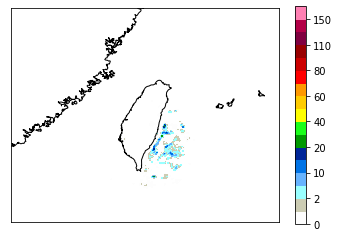

In [7]:
out=tools.QPE_2D_READ(QPE_dat)
bm.drawcoastlines()
bm.contourf(out.lon,out.lat,out(),**out.cwbcolorbar(),latlon=True)
plt.colorbar()

#  Radar  CV

unzip files
CWB CREF binary format([('', '<i2')])
TIME:Tue Jun  1 04:00:00 2021
DIMX,DIMY,DIMZ=1501,1501,1



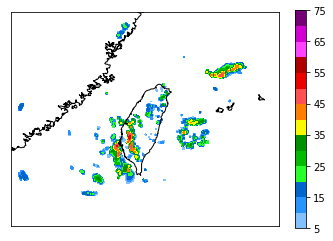

In [10]:
compress_dat='/IFS6/data2/datarfs/c164/test_data/radar/COMPREF/COMPREF.20181123.0000'
compress_dat='/IFS6/data2/datarfs/c164/test_data/radar/COMPREF/CREF_030min.20210601.040000.gz'

out=tools.COMPREF_READ(compress_dat)
bm.drawcoastlines()
bm.contourf(out.lon,out.lat,out(),**out.cwbcolorbar(),latlon=True)
plt.colorbar()
print(out)

unzip files
CWB mosaicked refl binary format([('', '<i2')])
TIME:Tue Jun  1 04:00:00 2021
DIMX,DIMY,DIMZ=441,561,21

-------colorbar
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]


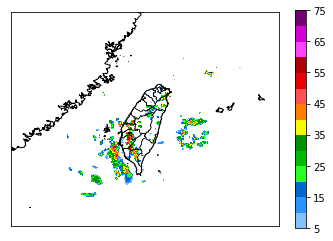

In [16]:
%matplotlib inline
import cwbplot.plotwrfvar as pltwrf
import numpy as np
MREF_dat='/IFS6/data2/datarfs/c164/test_data/radar/MREF/MREF3D21L.20210601.0400.gz'
#MREF_dat='/IFS6/data2/datarfs/c164/test_data/radar/MREF/MREF3D30L.20200212.0000'

out=tools.COMPREF_READ(MREF_dat)
print(out)
print('-------colorbar')
print(out.cwbcolorbar()['levels'])

pltwrf.state(bm)
#print((out.lat))
bm.drawcoastlines()
bm.contourf(out.lon,out.lat,np.max(out(),axis=2),**out.cwbcolorbar(),latlon=True)
#bm.pcolormesh(out.lon,out.lat,np.max(out(),axis=2),vmin=5,vmax=75,cmap=out.cwbcolorbar()['cmap'],latlon=True)
plt.colorbar()

# Radar Sweep

In [19]:
import cwbplot.cwb_radar_all as cwb_ra
from pyart.graph import RadarMapDisplayBasemap
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/c052/Pub/anaconda3/envs/plotenv/lib/python3.6/site-packages/pyart/graph/radarmapdisplay_basemap.py:81: DeprecationWarning: RadarMapDisplayBasemap is deprecated in favor of RadarMapDisplay. Basemap is still optional to use, but there will be no support if an error appears.
  DeprecationWarning)


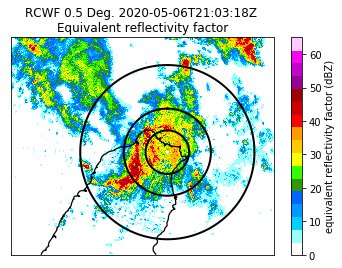

In [20]:
fname="/IFS6/data2/datarfs/c164/test_data/radar/RCWF.20200506.2103.bref_raw.01"
radar = cwb_ra.read_cwb_radar_sweep(fname)
display1 = RadarMapDisplayBasemap(radar)
cwb_data=['None','#9BFFFF','#00CFFF','#0198FF','#0165FF','#309901','#32FF00','#F8FF00','#FFCB00','#FF9A00','#FA0300','#CC0003','#A00000','#98009A','#C304CC','#F805F3','#FECBFF']
cmap = mcolors.ListedColormap(cwb_data,'precipitation')
norm = mcolors.BoundaryNorm(list(range(0,66,5)), cmap.N)
display1.plot_ppi_map(list(radar.fields.keys())[0], sweep=0, resolution='h',
                         vmin=0, vmax=65, min_lon=120, max_lon=123,
                         min_lat=24, max_lat=26.25,cmap = cmap,
                         mask_outside=True,
                         projection='aeqd')

display1.plot_range_rings([25,50,100])



# [Bonus] The possibility of plot manipulation

In [21]:
import cwbplot.plotwrfvar as pltwrf
import cwbplot.IO_tools as IO
from mpl_toolkits.basemap import Basemap
compress_dir='/IFS6/data2/datarfs/c164/test_data/radar/COMPREF/COMPREF.20181123.0000'


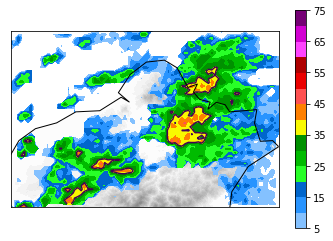

In [22]:
%matplotlib inline
out=IO.COMPREF_READ(compress_dir)
bm = Basemap(resolution='i',rsphere=(6370000.00,6370000.00),projection='lcc', llcrnrlon=121, urcrnrlon=122, llcrnrlat=24.8, urcrnrlat=25.4,lat_1 = 10., lat_2 = 40.,lon_0 = 121.76013, lat_0 = 24.128498)
pltwrf.terrain(bm,cmap='binary')
bm.contourf(out.lon,out.lat,out(),**out.cwbcolorbar(),latlon=True)
plt.colorbar()
CS=bm.contour(out.lon,out.lat,out(),[35],latlon=True)

bm.drawcoastlines()


In [23]:
from shapely.geometry import Polygon
poly_list=list()
for i in range(len(CS.collections[0].get_paths())):
  
    p = CS.collections[0].get_paths()[i]
    v = p.vertices
    x = v[:,0]
    y = v[:,1]
    try:
        poly = Polygon([(i[0], i[1]) for i in zip(x,y)])
        poly_list.append(poly)
    except:
         pass

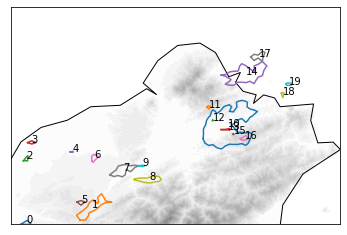

In [24]:
fig,ax = plt.subplots()
bm = Basemap(resolution='i',projection='cyl', llcrnrlon=121, urcrnrlon=122, llcrnrlat=24.9, urcrnrlat=25.3)

bm = Basemap(resolution='i',rsphere=(6370000.00,6370000.00),projection='lcc', llcrnrlon=121, urcrnrlon=122, llcrnrlat=24.8, urcrnrlat=25.4,lat_1 = 10., lat_2 = 40.,lon_0 = 121.76013, lat_0 = 24.128498)

pltwrf.terrain(bm,cmap='binary')
for i in range(len(poly_list)):
    x,y=poly_list[i].exterior.xy
    aa=poly_list[i].centroid.coords[0]
    plt.annotate(str(i),xy=(aa))
    ax.plot(x,y)
bm.drawcoastlines()

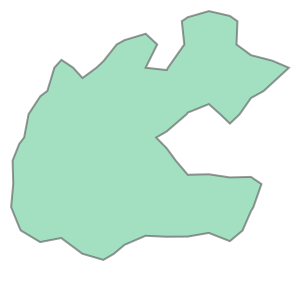

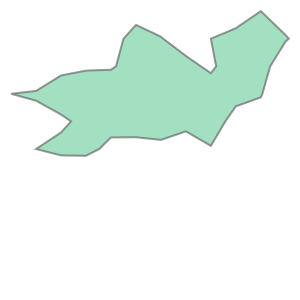

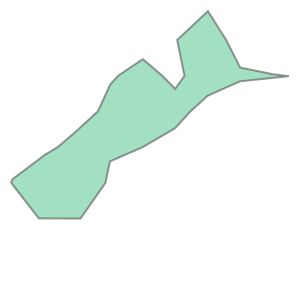

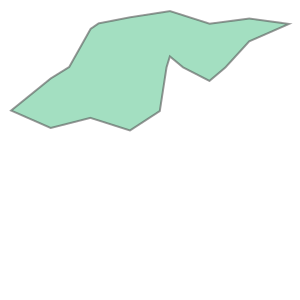

In [25]:
poly_list.sort(key=lambda x:x.area,reverse=True)
for i in range(4):
    display(poly_list[i])

In [ ]:
<iframe src="https://drive.google.com/file/d/1M_P8ZfN6rv6txj1IT4d4RXWEezmSoPq-/preview" width="640" height="480" allow="autoplay"></iframe>